In [1]:
## Add parent directory to system path so we can add modules from there
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [ ]:
## Auto reload changed modules
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

from evaluation import reading, evaluation

In [4]:
def is_negative(head, tail, cluster, all_pairs):
    if (head, tail) in all_pairs:
        return False
    else:
        return cluster[head] != cluster[tail]

In [5]:
fb15k_data = reading.read_dataset('fb15k')
wn_data = reading.read_dataset('wn')

In [7]:
fb15k = evaluation.Evaluation(*fb15k_data, is_negative=is_negative)
wn = evaluation.Evaluation(*wn_data, is_negative=is_negative)

In [8]:
fb15k.hits_n(10), wn.hits_n(10)

(0.5233447884748862, 0.8079)

In [9]:
thresholds = np.arange(0, 0.1, 0.01)
precision_fb = []
precision_wn = []
for t in thresholds:
    precision_fb.append(fb15k.hits_threshold(t))
    precision_wn.append(wn.hits_threshold(t))

(array([0., 1.]), array([ 15577, 102565]))
(array([0., 1.]), array([ 467, 9533]))
(array([0., 1.]), array([47188, 70954]))
(array([0., 1.]), array([1536, 8464]))
(array([0., 1.]), array([57230, 60912]))
(array([0., 1.]), array([2006, 7994]))
(array([0., 1.]), array([63882, 54260]))
(array([0., 1.]), array([2418, 7582]))
(array([0., 1.]), array([68623, 49519]))
(array([0., 1.]), array([2716, 7284]))
(array([0., 1.]), array([72456, 45686]))
(array([0., 1.]), array([2976, 7024]))
(array([0., 1.]), array([75565, 42577]))
(array([0., 1.]), array([3226, 6774]))
(array([0., 1.]), array([78065, 40077]))
(array([0., 1.]), array([3481, 6519]))
(array([0., 1.]), array([80172, 37970]))
(array([0., 1.]), array([3680, 6320]))
(array([0., 1.]), array([82054, 36088]))
(array([0., 1.]), array([3887, 6113]))


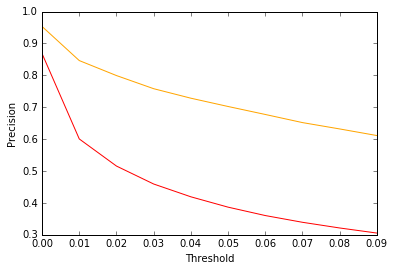

In [10]:
plt.plot(thresholds, precision_fb, color='red')
plt.plot(thresholds, precision_wn, color='orange')
plt.xlabel("Threshold")
plt.ylabel("Precision")

In [12]:
precisions_fb = []
precisions_wn = []
counts = []
times = []

for t in thresholds:
    begin = time.clock()
    precision, count = fb15k.hits_neg_threshold(t)
    end = time.clock()
    precisions_fb.append(precision)
    counts.append(count)
    times.append(end - begin)

(array([0., 1.]), array([ 88070, 148214]))
(array([0., 1.]), array([ 47463, 188821]))
(array([0., 1.]), array([ 57444, 178840]))
(array([0., 1.]), array([ 64073, 172211]))
(array([0., 1.]), array([ 68797, 167487]))
(array([0., 1.]), array([ 72610, 163674]))
(array([0., 1.]), array([ 75702, 160582]))
(array([0., 1.]), array([ 78187, 158097]))
(array([0., 1.]), array([ 80289, 155995]))
(array([0., 1.]), array([ 82167, 154117]))


In [13]:
np.mean(times)

5.4911104

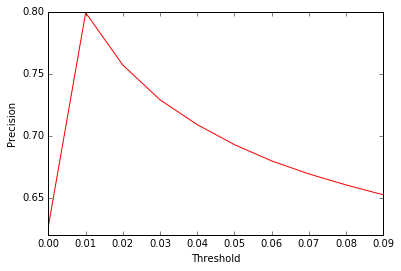

In [15]:
dims = 10
plt.plot(thresholds[:dims], precisions_fb[:dims], color='red')
plt.xlabel("Threshold")
plt.ylabel("Precision")

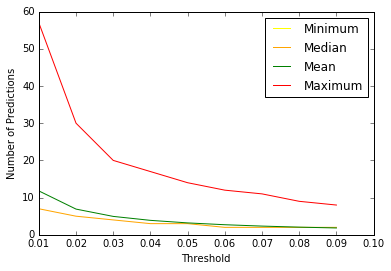

In [17]:
start = 1
plt.plot(thresholds[start:dims], np.min(counts, axis=1)[start:dims], color='yellow', label="Minimum")
plt.plot(thresholds[start:dims], np.median(counts, axis=1)[start:dims], color='orange', label="Median")
plt.plot(thresholds[start:dims], np.mean(counts, axis=1)[start:dims], color='green', label="Mean")
plt.plot(thresholds[start:dims], np.max(counts, axis=1)[start:dims], color='red', label="Maximum")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Number of Predictions")

In [19]:
precisions_fb = []
counts = []
times = []

for t in thresholds:
    begin = time.clock()
    precision, count = fb15k.hits_group(t)
    end = time.clock()
    precisions_fb.append(precision)
    counts.append(count)
    times.append(end - begin)

Grouping data...
(array([0., 1.]), array([1977249,  102565]))
(array([0., 1.]), array([48393, 70954]))
(array([0., 1.]), array([57784, 60912]))
(array([0., 1.]), array([64272, 54260]))
(array([0., 1.]), array([68934, 49519]))
(array([0., 1.]), array([72715, 45686]))
(array([0., 1.]), array([75787, 42577]))
(array([0., 1.]), array([78259, 40077]))
(array([0., 1.]), array([80355, 37970]))
(array([0., 1.]), array([82229, 36088]))


In [20]:
np.mean(times)

2.629335699999994

In [21]:
np.max(precisions_fb)

0.5945185048639681

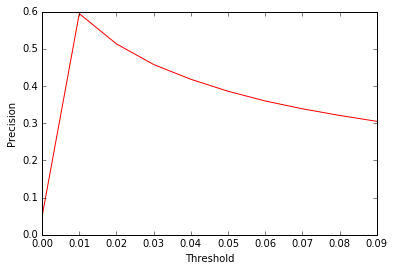

In [22]:
plt.plot(thresholds, precisions_fb, color='red')
plt.xlabel("Threshold")
plt.ylabel("Precision")

In [24]:
precision, counts = fb15k.hits_group(0.011, False)

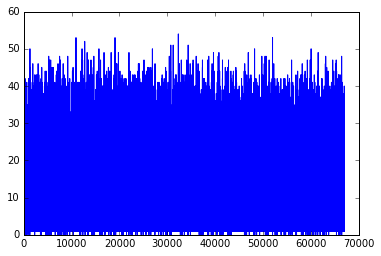

In [25]:
plt.plot(counts)

In [26]:
## Becnhmark with approx. maximum
iterations = 10
threshold = 0.0011

times_group = []
times_neg = []

for i in range(iterations):
    start = time.clock()
    fb15k.hits_group(threshold)
    end = time.clock()
    times_group.append(end - start)
    
    start = time.clock()
    fb15k.hits_neg_threshold(threshold)
    end = time.clock()
    times_neg.append(end - start)

print("Grouped:", np.mean(times_group), "Only Negatives:", np.mean(times_neg))

(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
Grouped: 1.9222937999999972 Only Negatives: 13.413266599999996


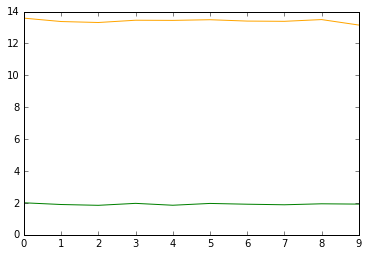

In [27]:
plt.plot(times_group, color='green')
plt.plot(times_neg, color='orange')
plt.show()

In [28]:
# TODO:
# Select negative samples from graph.
# Approaches:
# 1. Cluster the graph and select nodes pairs from to very different clusters – these should not appear in the data
# 2. Find nodes that never have an edge of some type

In [30]:
# Average probability among top 10
top_n = 10
top_prob = fb15k_data[1][:, :top_n]
np.median(top_prob), np.mean(top_prob), np.max(top_prob), np.min(top_prob)

(0.0241295, 0.07042871778164919, 1.00001, 1e-05)

In [32]:
fb15k_data[1].shape[1]

300

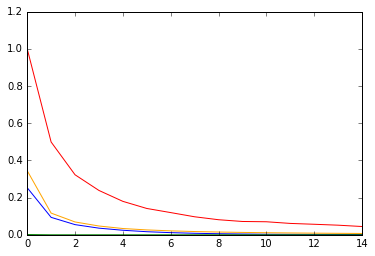

In [31]:
dims = 15
plt.plot(np.arange(dims), np.median(fb15k_data[1], axis=0)[:dims], color='blue')
plt.plot(np.arange(dims), np.mean(fb15k_data[1], axis=0)[:dims], color='orange')
plt.plot(np.arange(dims), np.max(fb15k_data[1], axis=0)[:dims], color='red')
plt.plot(np.arange(dims), np.min(fb15k_data[1], axis=0)[:dims], color='green')
plt.show()

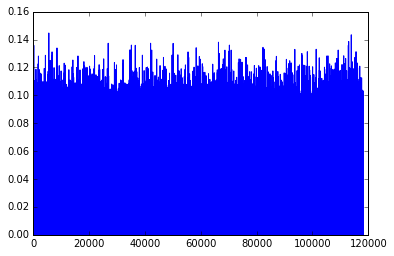

In [34]:
x = np.arange(len(top_prob))
plt.plot(x, np.median(top_prob, axis=1), color='blue')
#plt.plot(x, np.mean(top_prob, axis=1), color='orange')
#plt.plot(x, np.max(top_prob, axis=1), color='red')
#plt.plot(x, np.min(top_prob, axis=1), color='green')
plt.show()